# 1 Введение

## 1.1 Постановка задачи

**Заказчик** -- интернет-магазин, который продаёт по всему миру компьютерные игры.  
  
**Задача** -- спланировать рекламную кампанию на 2017-й.

## 1.2 Исходные данные

### 1.2.1 Общее описание
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
  
Переданы данные до 2016 года. 
  
В наборе данных используется аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»

### 1.2.2 Переданные файлы
- games.csv

### 1.2.3 Описание данных

#### 1.2.3.1 Таблица *games*
- *Name* — название игры;
- *Platform* — платформа;
- *Year_of_Release* — год выпуска;
- *Genr* — жанр игры;
- *NA_sales* — продажи в Северной Америке (миллионы долларов);
- *EU_sales* — продажи в Европе (миллионы долларов);
- *JP_sale*s — продажи в Японии (миллионы долларов);
- *Other_sales* — продажи в других странах (миллионы долларов);
- *Critic_Score* — оценка критиков (максимум 100);
- *User_Score* — оценка пользователей (максимум 10);
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## 1.3 План обработки и анализа данных

### 1.3.1 Предобработка данных
- обзор данных;
- корректировка имён столбцов (при необходимости);
- обнаружение и удаление пропусков:
 - выявить пропуски;
 - проанализировать причины их появления;
 - заполнить пропуски (приняв решение по алгоритму заполнения), либо удалить их;
- преобразование типов данных столбцов (при необходимости);
- поиск и исправление ошибок (аномальных значений) в данных;
- удалить дуликаты строк.
  
>**<big>!</big>** Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом

### 1.3.2 Дополнение данных
Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец

### 1.3.3 Анализ данных

#### 1.3.3.1 Исследовательский анализ данных
- оценить, сколько игр выпускалось в разные годы; определить важны ли данные за все периоды;
- оценить, как менялись продажи по платформам; выбрать платформы с наибольшими суммарными продажами и построить распределение по годам; выявить характерный срок, за который появляются новые и исчезают старые платформы;
- на основании выводов на предыдущих шагах выбрать актуальный период и учитывать в анализе данные за этот период, при учёте, что эти данные помогут построить прогноз на 2017 год;
- определить какие платформы лидируют по продажам, растут или падают; выбрать несколько потенциально прибыльных платформ;
- построить график *«ящик с усами»* по глобальным продажам каждой игры и разбивкой по платформам; определить велика ли разница в продажах, в средних продажах на разных платформах;
- определить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков; построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами;
- соотнести выводы с продажами игр на других платформах;
- оценить общее распределение игр по жанрам; оценить самые прибыльные жанры; определить выделяются ли жанры с высокими и низкими продажами.

#### 1.3.3.2 Составление портрета пользователя каждого региона
Определить для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5); описать различия в долях продаж;
- самые популярные жанры (топ-5); описать разницу;
- определить влияет ли рейтинг ESRB на продажи в отдельном регионе;

### 1.3.4 Проверка гипотез
Необходимо проверить:
- средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковые;
- средние пользовательские рейтинги жанров *Action* и *Sports* разные.  
  
Для этого необходимо:
- сформулировать нулевые и альтернативные гипотезы;
- выбрать и обосновать значение *alpha* ($\alpha$);
- выбрать и обосновать критерий проверки гипотез;
- провести проверку гипотез.

### 1.3.5 Вывод

## 1.4 Пользовательские функции

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from IPython.core.display import HTML

pd.options.display.float_format = '{:.2f}'.format

In [1]:
def null_counts_percent(column):
    '''
    Функция вывода количества и процента от общего числа NAN значений столбца
    '''
    print('nulls count:', column.isna().sum())
    print('nulls percent:', column.isna().sum() / len(column) * 100)

In [1]:
def value_counts_percent(column, ret=False):
    '''
    Функция вывода количества и процента от общего числа значений столбца
    '''
    temp_df = pd.DataFrame({
                'count':column.value_counts(),
                'percent': column.value_counts() / len(column) * 100})

    if ret: return temp_df
    else: print(temp_df)    
    

In [1]:
def distplot(data, plot_title='', x_title='', bins=10, figsize=(16, 7)):
    '''
    Функция отрисовки гистограммы с линией распределения плотности вероятности
    '''
    with sns.axes_style('whitegrid'):
        fig, ax = plt.subplots(figsize=figsize)
        ax.set_title(plot_title)
        sns.distplot(data, ax=ax, bins=bins, axlabel=x_title)
    print()

In [1]:
def barplot(data, x='', y='', plot_title='', x_title='', y_title='', estimator=sum, figsize=(16, 7)):
    '''
    Функция отрисовки столбчатой диаграммы
    '''
    with sns.axes_style('whitegrid'):
        fig, ax = plt.subplots(figsize=figsize)
        sns.barplot(x=x, y=y,data=data, ax=ax, estimator=estimator)
        ax.set_title(plot_title)
        plt.xlabel(x_title)
        plt.ylabel(y_title)
    print()

In [1]:
def boxplot(data, x='', y='', plot_title='', x_title='', y_title='', showmeans=True, figsize=(16, 7),
            ylim=(0,2)):
    '''
    Функция отрисовки диаграммы размаха
    '''
    with sns.axes_style('whitegrid'):
        fig, ax = plt.subplots(figsize=figsize)
        sns.boxplot(x=x, y=y, data=data, ax=ax, showmeans=showmeans)
        plt.ylim(ylim)
        ax.set_title(plot_title)
        plt.xlabel(x_title)
        plt.ylabel(y_title)

In [1]:
def lineplot_matrix(i, j, data, title='', cells=[], xlabel='', ylabel='', figsize=(0,0)):
    '''
    Функция отрисовки матрицы линйных графиков
    '''
    fig, axs = plt.subplots(i, j, figsize=figsize, constrained_layout=True)
    sns.set(style="whitegrid")

    for row in range(i):
        for col in range(j):
            _cell = cells.pop(0)
            axs[row][col].set_title(title + _cell)
            axs[row][col].set_xlabel(xlabel)
            axs[row][col].set_ylabel(ylabel)
            sns.lineplot(data=data.loc[_cell], ax=axs[row][col]) 

In [1]:
def regplots_scores(platform):
    '''
    Функция отрисовки линий регрессии для выбранной платформы
    '''
    fig, axs = plt.subplots(1, 2, figsize=(16,5), constrained_layout=True)
    sns.set(style="whitegrid")
    
    sns.regplot(data=actual_games.loc[(actual_games['platform'] == platform),:], 
                x='user_score',
                y='total_sales', 
                ax=axs[0])
    axs[0].set_title('Платформа ' + platform)
    axs[0].set_xlabel('Отзывы пользователей')
    axs[0].set_ylabel('Объемы продаж, млн.$')
    
    sns.regplot(data=actual_games.loc[(actual_games['platform'] == platform),:], 
                x='critic_score',
                y='total_sales', 
                ax=axs[1])
    axs[1].set_title('Платформа ' + platform)
    axs[1].set_xlabel('Отзывы критиков')
    axs[1].set_ylabel('Объемы продаж, млн.$')
    
    if actual_games.loc[(actual_games['platform'] == platform),'user_score'].sum() != 0:
        print('Платформа ', platform, ', зависимость продаж от отзывов пользователей: ', 
              actual_games.loc[actual_games['platform'] == platform, 'total_sales']
              .corr(actual_games.loc[(actual_games['platform'] == platform),'user_score'])
              .round(3),
              sep='')
    else: print('Отзывы пользователей для платформы', platform, 'отсутствуют')

    if actual_games.loc[(actual_games['platform'] == platform),'critic_score'].sum() != 0:
        print('Платформа ', platform, ', зависимость продаж от отзывов критиков:', 
              actual_games.loc[actual_games['platform'] == platform, 'total_sales']
              .corr(actual_games.loc[(actual_games['platform'] == platform),'critic_score'])
              .round(3),
              sep='')
    else: print('Отзывы критиков для платформы', platform, 'отсутствуют')

In [1]:
def top5_pie_charts(index):
    '''
    Функция отрисовки круговых диаграм Топ-5 платфор по продажам
    '''
    fig, axs = plt.subplots(1, 3, figsize=(16,5), constrained_layout=True)
    regions = ['na_sales', 'eu_sales', 'jp_sales']
    titles = ['Северная Америка', 'Европа' , 'Япония']
    subplot = 0
    
    for reg in regions:
        df = (actual_games.pivot_table(index=index, values=reg, aggfunc='sum')
                          .sort_values(by=reg, ascending = False)
                          .head(5))

        labels = df.index.tolist()
        sizes = df[reg].tolist()

        axs[subplot].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
        axs[subplot].axis('equal')
        axs[subplot].set_title(titles[subplot])
        
        subplot += 1
        
        display(HTML(df.T.to_html()))

In [1]:
def ESRB_effect():
    '''
    Функция вывода процента реализации в зависимости от рейтинга ESRB
    '''
    fig, axs = plt.subplots(1, 4, figsize=(16,5), constrained_layout=True)
    regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
    titles = ['Северная Америка', 'Европа' , 'Япония', 'Осталные регионы']
    subplot = 0
    
    for reg in regions:
        df = actual_games.pivot_table(index='rating', values=reg, aggfunc='sum')

        labels = df.index.tolist()
        sizes = df[reg].tolist()

        axs[subplot].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
        axs[subplot].axis('equal')
        axs[subplot].set_title(titles[subplot])
        
        subplot += 1

ModuleNotFoundError: No module named 'matplotlib.pyplot'

# 2 Основная часть

## 2.1 Предобработка данных

### 2.1.1 Таблица *table*

**Обзор данных**

In [2]:
games = pd.read_csv('games.csv')

In [3]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,nan,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,nan,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,nan,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


По итогам первого, общего взгляда на данные, можно сделать следующие выводы:

- набор данных состоит из 11 столбцов и 16715 строк;
- имена столбцов читабельны, но требуют приведения их к нижнему регистру;
- имеются пропуски в столбцах:
 - *name* -- вероятнее всего, это результат ошибок в заполнении данных, восстановлению не подлежат;
 - *year_of_release* -- вероятнее всего, это результат ошибок в заполнении данных, восстановить возможно из дополнительных открытых источников по названию игры;
 - *genre* -- вероятнее всего, это результат ошибок в заполнении данных, восстановить возможно из дополнительных открытых источниковпо названию игры;
 - *critic_score* -- пропсуки не являются ошибочными, поскольку оценке критиков подвергаются не все игры на рынке, а только популярные, либо игры с развернутой рекламной компанией;
 - *user_score* -- пропсуки не являются ошибочными, поскольку оценке пользователей подвергаются не все игры на рынке, а только популярные; 
 - *rating* -- пропсуки не являются ошибочными, поскольку рейтинг ESRB присваивается играм, прдаваемым в США и Канаде.  
  
Необходимо сменить типы данных (в случае возможности):
- *year_of_release* на *int*;
- *user_score* на *float*.

**Корректировка имён столбцов**

In [5]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Обнаружение и удаление пропусков  
Преобразование типов данных столбцов**

In [6]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
games.loc[games['name'].isna(),:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


Игры без названий, без жанра и 1993 года выпуска для анализа рынка на 2017 год нам не интересны -- удаляем

In [8]:
games.dropna(subset = ['name'], inplace = True)
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Нам повезло -- игр без названия и жанра было в переданных данных пренебрежительно мало. Однако, если бы пропусков данного типа было бы весомое количество, то их пришлось бы заполнять.  
  
Достоверно заполнить названия игр вряд ли бы получилось, но для ответа на поставленные вопросы название игры не имеет значение (важно знать платформу и жанр игры), поэтому данные пропуски можно было бы заполнить случайной символьной последовательностью.  
Пропуски в жанрах игр можно было бы восставноить из открытых источников (поиском в Интернете) по названию и году выпуска игры.

In [9]:
null_counts_percent(games['year_of_release'])

nulls count: 269
nulls percent: 1.6095255190570215


Количество игр, для которых не указан год выпуска, незначительно, поэтому они могут быть удалены из набора данных

In [10]:
games.dropna(subset = ['year_of_release'], inplace = True)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [11]:
null_counts_percent(games['critic_score'])

nulls count: 8461
nulls percent: 51.453417659936754


Огрмное количество пропусков, удалять нельзя

In [12]:
np.sort(games['critic_score'].unique())

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

Преобразуем значения столбца к типу *int*. 

In [13]:
games['critic_score'].fillna(0, inplace=True)
games['critic_score'] = games['critic_score'].astype(int)
games.loc[games['critic_score'] == 0, 'critic_score'] = np.nan
np.sort(games['critic_score'].unique())

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [14]:
null_counts_percent(games['user_score'])

nulls count: 6605
nulls percent: 40.166626125030405


Большое количество пропусков, удалять нельзя

In [15]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значения столбца необходимо преобразовать из *str* во *float*. При этом значение *tbd (To Be Determined)* будем считать отсутствием рейтинга и заменим *tbd* на NaN.

In [16]:
games['user_score'].fillna('-1', inplace=True)
games.loc[games['user_score'] == 'tbd', 'user_score'] = '-1'
games['user_score'] = pd.to_numeric(games['user_score'])
games.loc[games['user_score'] == -1, 'user_score'] = np.nan
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [17]:
null_counts_percent(games['rating'])

nulls count: 6676
nulls percent: 40.59839455120409


Большое количество пропусков, удалять нельзя

In [18]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [20]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

Преобразуем тип значений столбца в *int*

In [21]:
games['year_of_release'] = games['year_of_release'].astype(int)
games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

**Удаление дубликатов**

In [22]:
games.duplicated().sum()

0

Дубликаты строк отсутствуют

***Промежуточный итог***  
  
На этапе предобработки данных в таблице **games**:
- имена столбцов приведены к нижнему регистру;
- удалены строки с пропусками в названиях игр и годов выпуска;
- в столбце ***critic_score*** пропуски заменены на значение -1, тип данных столбца преобразован в *int*;
- в столбце ***user_score*** пропуски и значения *tbd* заменены на значение -1, тип данных столбца преобразован во *float*;
- в столбце ***rating*** пропуски заменены на значение -1;
- тип данных столбца ***year_of_release*** преобразован в *int*.  
  
Дубликаты строк в таблице **games** отсутствуют.

## 2.2 Дополнение данных

In [23]:
games['total_sales'] = (games['na_sales'] +
                        games['eu_sales'] +
                        games['jp_sales'] +
                        games['other_sales'])
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,nan,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,nan,nan,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,nan,nan,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,nan,nan,NaN,0.01


## 2.3 Анализ данных

### 2.3.1 Исследовательский анализ данных

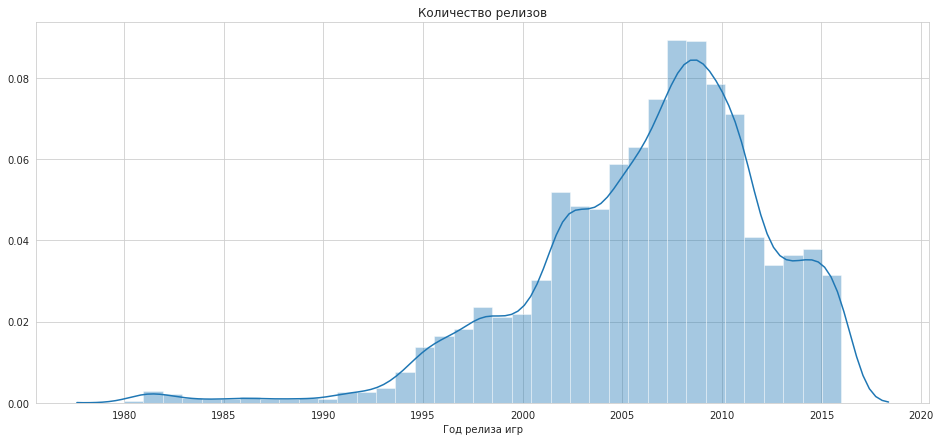

In [24]:
distplot(games['year_of_release'],
         plot_title='Количество релизов',
         x_title='Год релиза игр',
         bins=37)

Заметный всплеск числа релизов начался приблизительно с 1994 года, интенсивно рос до 2000 года, после чего произошло их резкое ежегодное увеличение. Верояно, особенный интерес для нас будет представлять период с 2000 по 2016 год

По всей видимости, данная гистограмма показывает, что рынок компьютерных игр перерождался -- уходили в прошлое традиционные игровые платформы и на их место приходили полатформы мобильные, смартфонные.

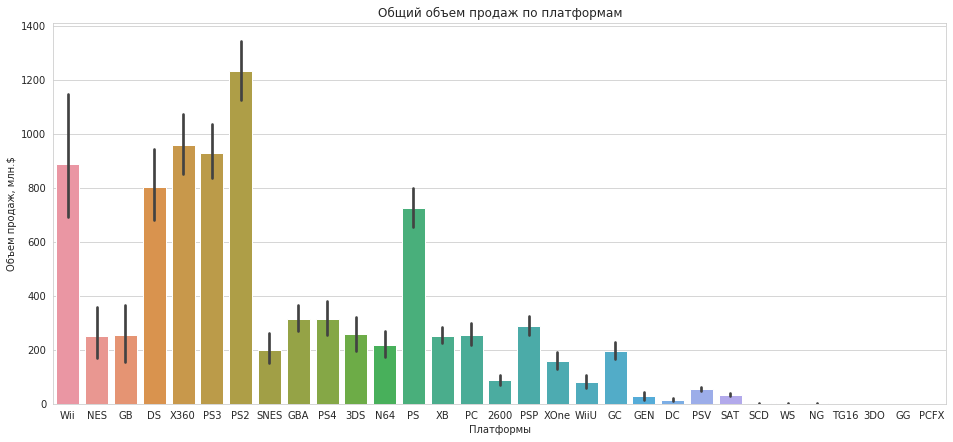

In [25]:
barplot(games, 
        x='platform', 
        y='total_sales', 
        estimator=sum,
        plot_title='Общий объем продаж по платформам', 
        x_title='Платформы',
        y_title='Объем продаж, млн.$')

Продолжим анализ данных для платформ, суммарный объем продаж для которых был больше 100 млн.$

In [26]:
platforms_total_sales = games.groupby('platform')['total_sales'].sum() > 100

actual_platforms_list = []

for i in platforms_total_sales.index:
    if platforms_total_sales[i]:
        actual_platforms_list.append(i)

In [27]:
actual_platforms = games.loc[games['platform'].isin(actual_platforms_list),:]

In [28]:
(actual_platforms
     .pivot_table(index='platform', values='total_sales', aggfunc='sum')
     .sort_values(by='total_sales', ascending = False)
     .swapaxes('index', 'columns'))

platform,PS2,X360,PS3,Wii,DS,PS,PS4,GBA,PSP,3DS,PC,GB,XB,NES,N64,SNES,GC,XOne
total_sales,1233.56,961.24,931.34,891.18,802.78,727.58,314.14,312.88,289.53,257.81,255.76,254.43,251.57,251.05,218.01,200.04,196.73,159.32


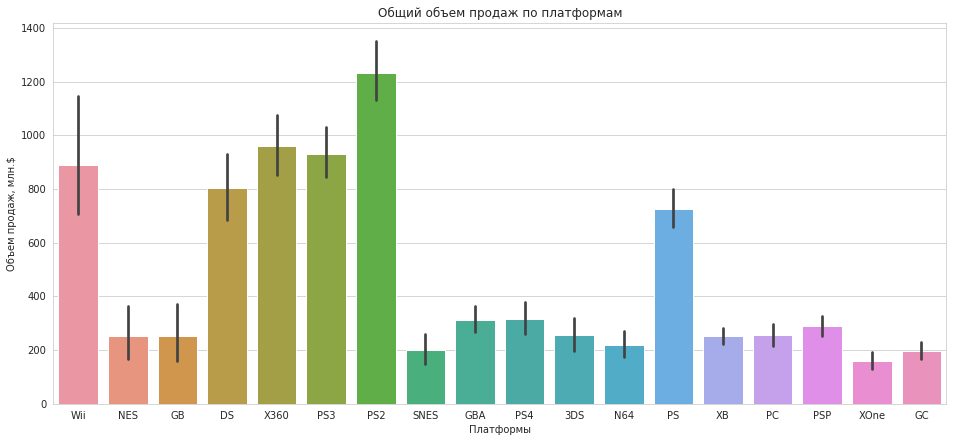

In [29]:
barplot(actual_platforms, 
        x='platform', 
        y='total_sales', 
        estimator=sum,
        plot_title='Общий объем продаж по платформам', 
        x_title='Платформы',
        y_title='Объем продаж, млн.$')

Далее проанализируем для актуальных платформ изменение объемов продаж по годам 

In [30]:
platforms_year_total_sales = (actual_platforms.pivot_table(index='platform',
                                                           columns='year_of_release',
                                                           values='total_sales',
                                                           aggfunc='sum')
                                              .fillna(0))
platforms_year_total_sales.head(10)

year_of_release,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
3DS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,63.20,51.36,56.57,43.76,27.78,15.14
DS,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,146.94,145.31,119.54,85.02,26.18,11.01,1.54,0.00,0.00,0.00
GB,0.00,0.00,0.00,0.00,0.00,1.43,64.97,4.89,5.57,25.49,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GBA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
GC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
N64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NES,10.96,50.08,53.44,36.41,19.76,45.01,7.85,15.73,6.11,1.98,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PC,0.00,0.00,0.04,0.00,0.00,0.03,0.00,0.00,0.00,3.03,...,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25
PS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


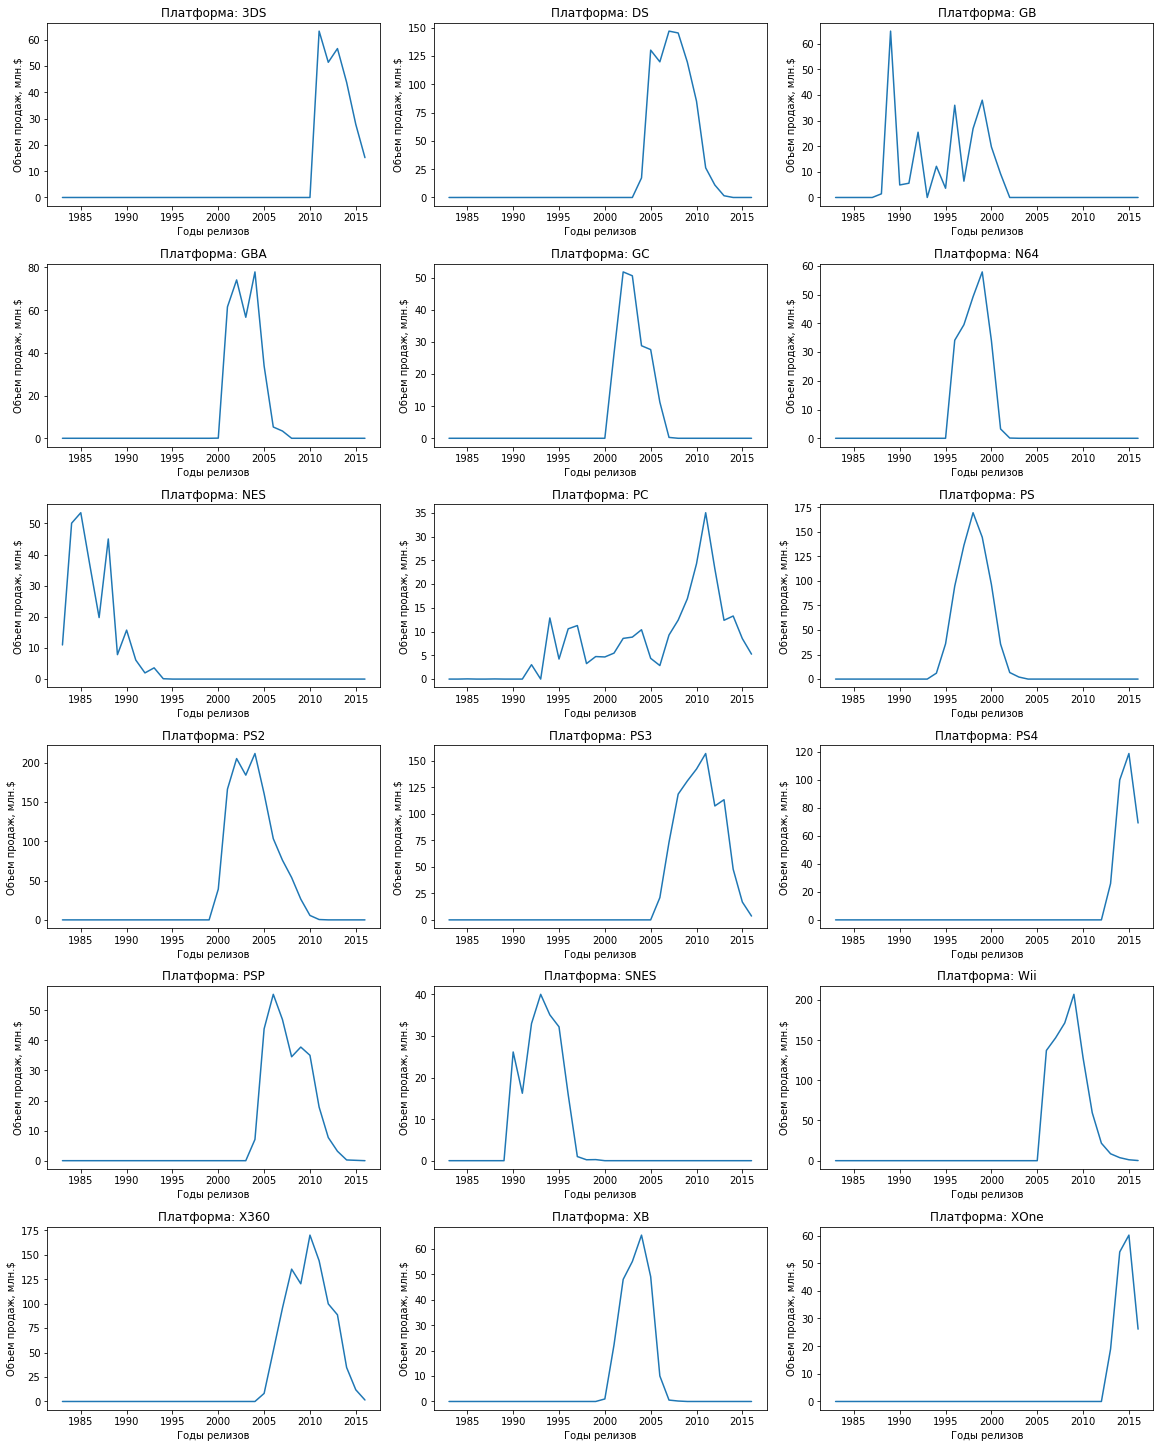

In [31]:
lineplot_matrix(6, 3, platforms_year_total_sales,
                     title='Платформа: ', 
                     cells=actual_platforms_list.copy(),
                     xlabel='Годы релизов',
                     ylabel='Объем продаж, млн.$',
                     figsize=(16, 20))

Из графиков наглядно видно, что каждая платформа имеет ограниченный срок "жизни" -- каждая из них появляется и, через некоторое время, становится неактуальной. Определим средний срок "жизни" платформы

In [32]:
counts = []
years = platforms_year_total_sales.columns

for platform in platforms_year_total_sales.index:
    _count = 0
    for year in years:
        if platforms_year_total_sales.loc[platform, year] != 0.0: 
            _count += 1
    counts.append(_count)

np.mean(counts)

10.277777777777779

Средний срок "жизни" платформы равен 10 годам. Таким образом к 2016 году будут "доживать" платформы появившиеся в 2006 году, а наиболее актуальными будут платформы, появившиеся в 2011 году. Поэтому для дальнейшего анализа будем рассматривать период с 2011 по 2016 год.

In [33]:
actual_games = actual_platforms.loc[games['year_of_release'] >= 2011, :]
actual_games.reset_index(drop=True)
actual_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.00,3.40,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,nan,nan,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,nan,nan,NaN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,nan,nan,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.00,7.60,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.00,5.80,T,0.01
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.00,7.20,E10+,0.01


In [34]:
platforms_year_total_sales = (actual_games.pivot_table(index='platform',
                                                       columns='year_of_release',
                                                       values='total_sales',
                                                       aggfunc='sum')
                                          .fillna(0))
platforms_year_total_sales

year_of_release,2011,2012,2013,2014,2015,2016
platform,,,,,,
3DS,63.20,51.36,56.57,43.76,27.78,15.14
DS,26.18,11.01,1.54,0.00,0.00,0.00
PC,35.03,23.22,12.38,13.28,8.52,5.25
PS2,0.45,0.00,0.00,0.00,0.00,0.00
PS3,156.78,107.36,113.25,47.76,16.82,3.60
PS4,0.00,0.00,25.99,100.00,118.90,69.25
PSP,17.82,7.69,3.14,0.24,0.12,0.00
Wii,59.65,21.71,8.59,3.75,1.14,0.18
X360,143.84,99.74,88.58,34.74,11.96,1.52


<a id="cell_1"></a>
К 2016 году продаваемыми были игры 6-ти платформ. При этом у всех платформ наблюдается падение продаж. Наиболее "живыми" являются платформы (в порядке убывания):
- **PS4**;
- **XOne**;
- **3DS**.  
  
При этом, ещё продаваемые **X360**, **PS3** и **Wii** уже не актуальны к 2016 году, а **PC** "эластична" -- продажи невелики, но относительно равномерны за весь период.  


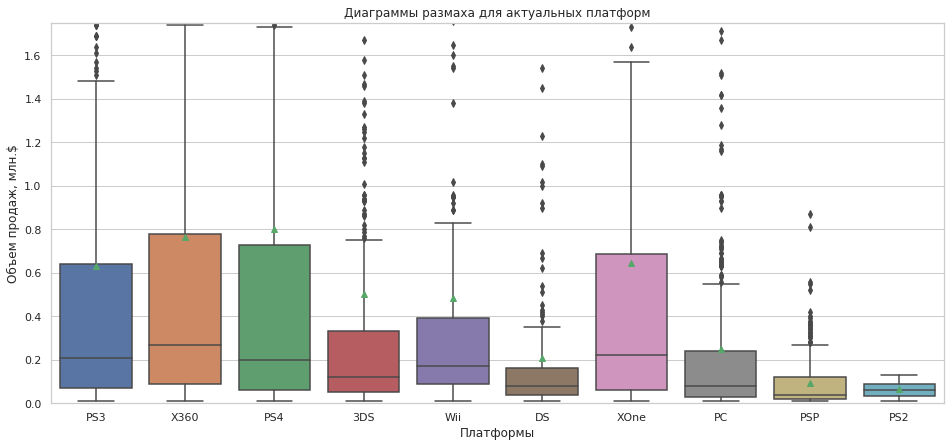

In [36]:
boxplot(actual_games,
        x='platform',
        y='total_sales',
        plot_title='Диаграммы размаха для актуальных платформ',
        x_title='Платформы',
        y_title='Объем продаж, млн.$',
        ylim = (0,1.75))

Разница в абсолютных объемах продаж по платформам ярко выражена. Выделяются четыре лидера -- **X360**, **PS3**, **PS4**, **XOne**. Их средние значения также близки друг к другу. Лидерство данных платформ говорит об их актуальности (прибыльности) в выбранный промежуток времени для анализа.  
  
[Ранее](#cell_1) были выделены 3 наиболее перспективные платформы. С учётом текущих выводов рассмотрим, как влияют на продажи отзывы пользователей и критиков внутри платформы **PS4** .

Платформа PS4, зависимость продаж от отзывов пользователей: -0.032
Платформа PS4, зависимость продаж от отзывов критиков:0.407


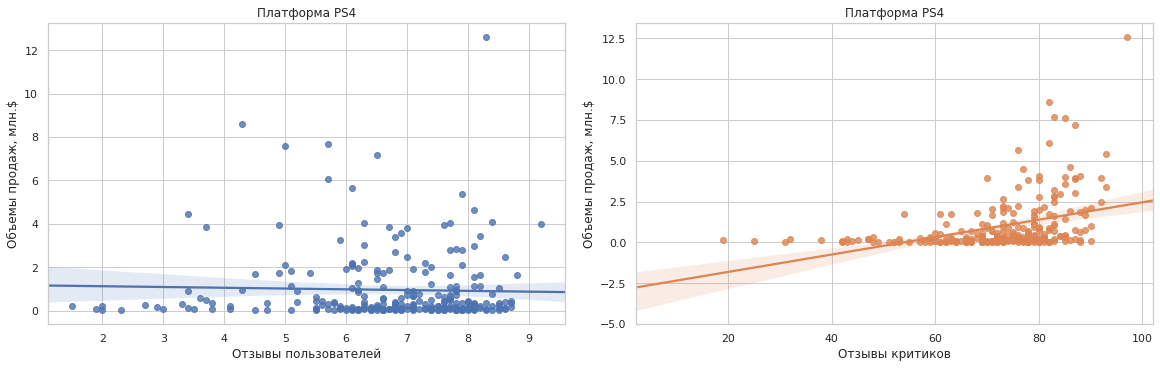

In [37]:
regplots_scores('PS4')

Отзывы пользователей не оказывают влияние на объемы продаж -- корреляция мала и (что забавно) имеет отрицательный знак, т.е., чем выше рейтигнг игры среди пользователей, тем она хуже продаётся.  
К отзывам критиков пользователи прислушиваются -- корреляция прослеживается, имеет положительный знак.  
  
Похоже, пользователи доверяют больше критикам, чем "сарафанному радио". Возможно это связано с формой подачи результатов обзоров, которые проводят критики. Возможно их аргументы воспринимаются, как более весомые и аргументированные. Будем это иметь ввиду.  
  
Проверим, как выглядят данные зависимости у остальных платформ.

In [38]:
platforms = platforms_year_total_sales.index.tolist()
platforms.remove('PS4')

Платформа 3DS, зависимость продаж от отзывов пользователей: 0.222
Платформа 3DS, зависимость продаж от отзывов критиков:0.349


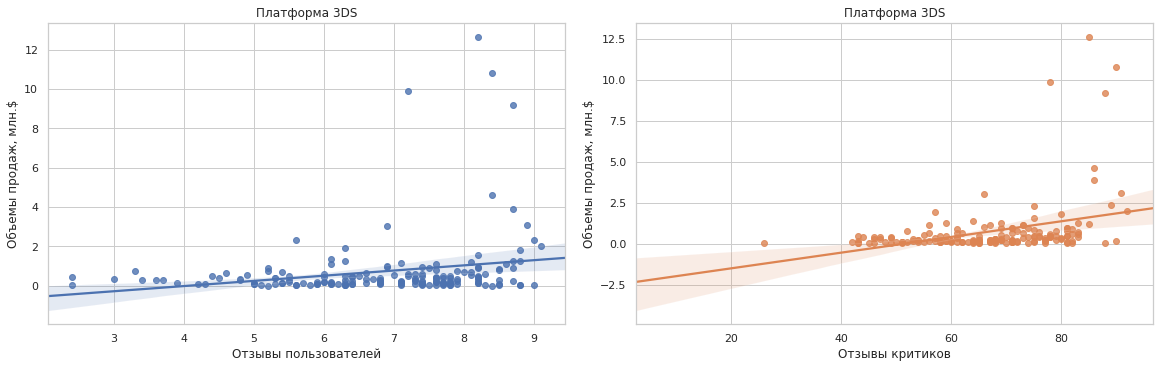

In [39]:
regplots_scores(platforms.pop(0))

Платформа DS, зависимость продаж от отзывов пользователей: 0.281
Платформа DS, зависимость продаж от отзывов критиков:0.261


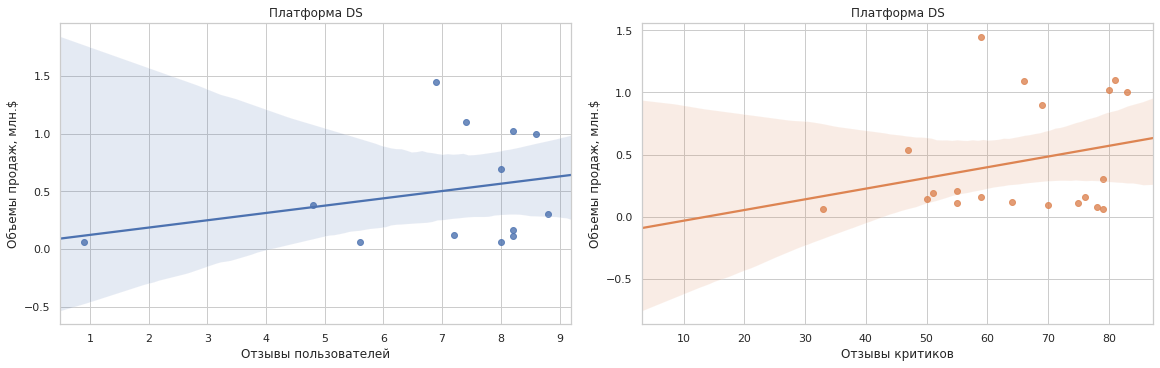

In [40]:
regplots_scores(platforms.pop(0))

Платформа PC, зависимость продаж от отзывов пользователей: -0.049
Платформа PC, зависимость продаж от отзывов критиков:0.314


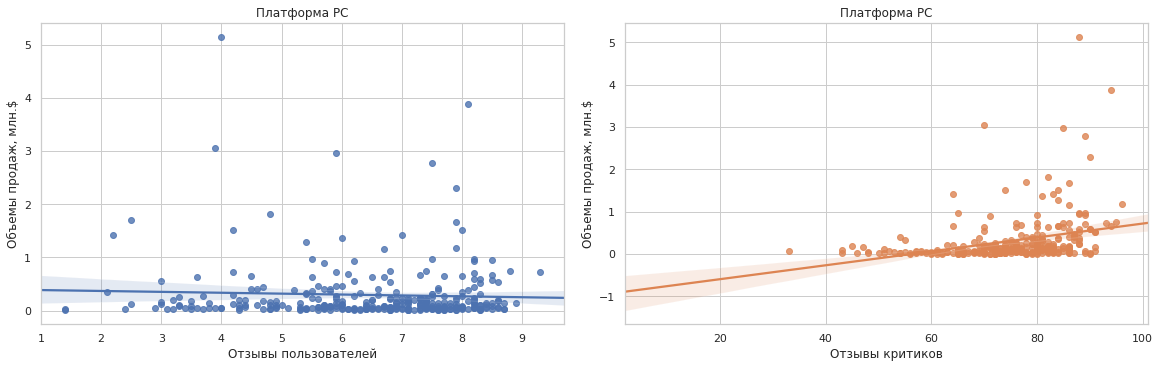

In [41]:
regplots_scores(platforms.pop(0))

Платформа PS2, зависимость продаж от отзывов пользователей: -0.488
Отзывы критиков для платформы PS2 отсутствуют


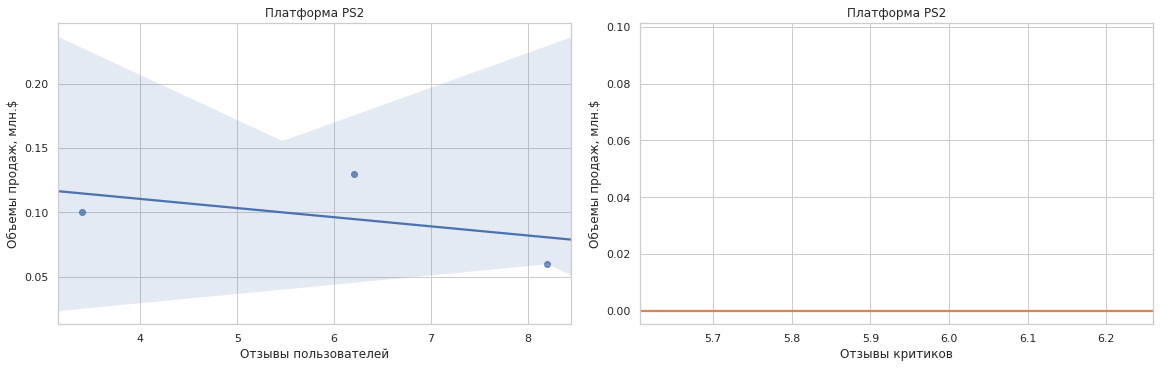

In [42]:
regplots_scores(platforms.pop(0))

Платформа PS3, зависимость продаж от отзывов пользователей: 0.014
Платформа PS3, зависимость продаж от отзывов критиков:0.38


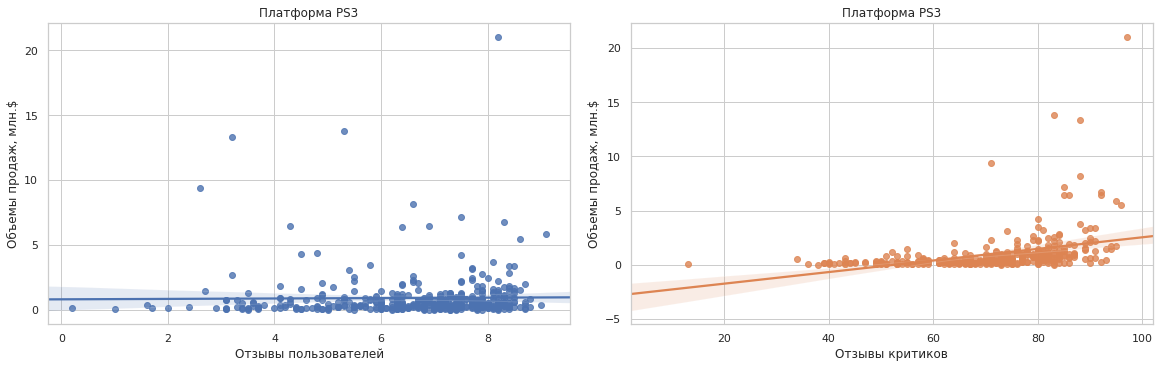

In [43]:
regplots_scores(platforms.pop(0))

Платформа PSP, зависимость продаж от отзывов пользователей: 0.01
Платформа PSP, зависимость продаж от отзывов критиков:0.358


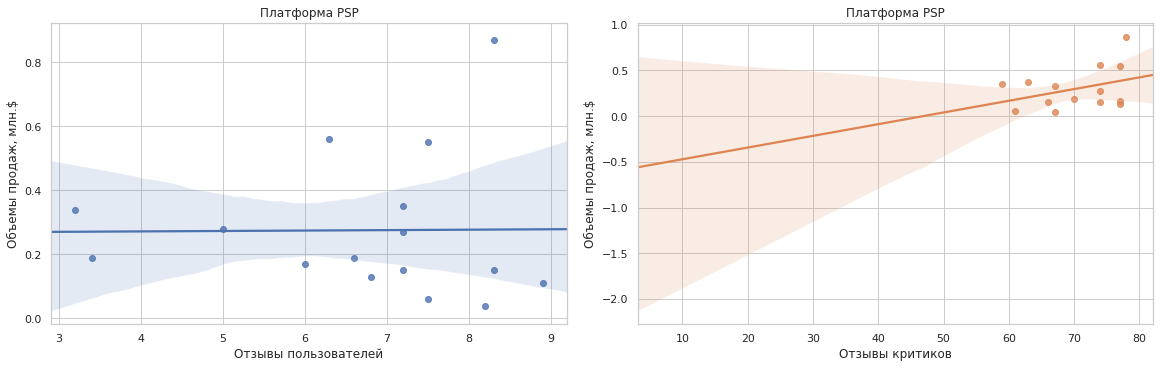

In [44]:
regplots_scores(platforms.pop(0))

Платформа Wii, зависимость продаж от отзывов пользователей: 0.146
Платформа Wii, зависимость продаж от отзывов критиков:0.292


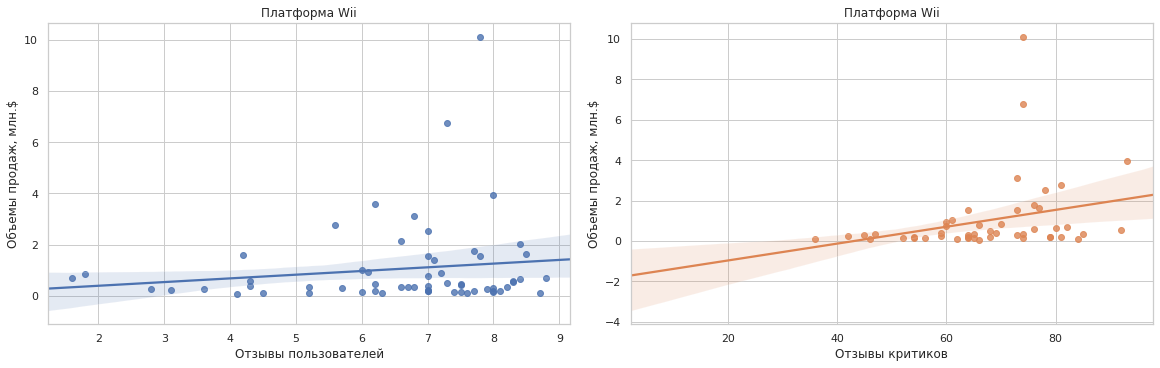

In [45]:
regplots_scores(platforms.pop(0))

Платформа X360, зависимость продаж от отзывов пользователей: 0.039
Платформа X360, зависимость продаж от отзывов критиков:0.391


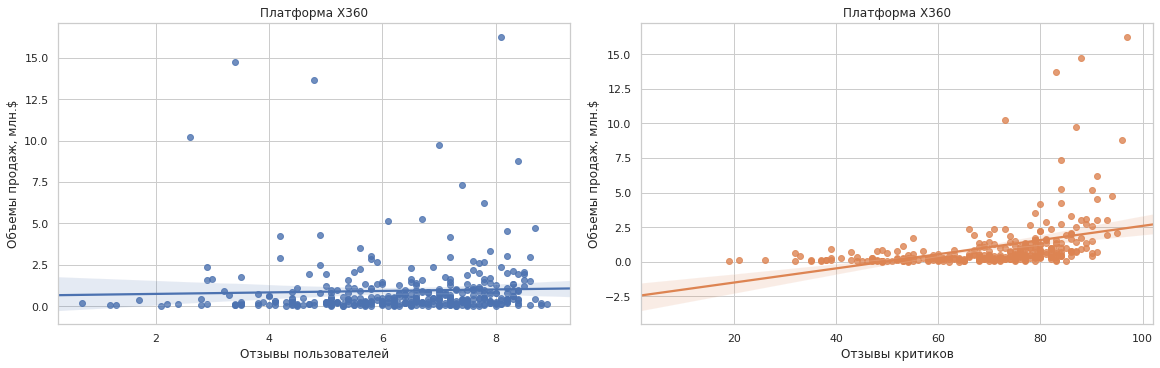

In [46]:
regplots_scores(platforms.pop(0))

Платформа XOne, зависимость продаж от отзывов пользователей: -0.069
Платформа XOne, зависимость продаж от отзывов критиков:0.417


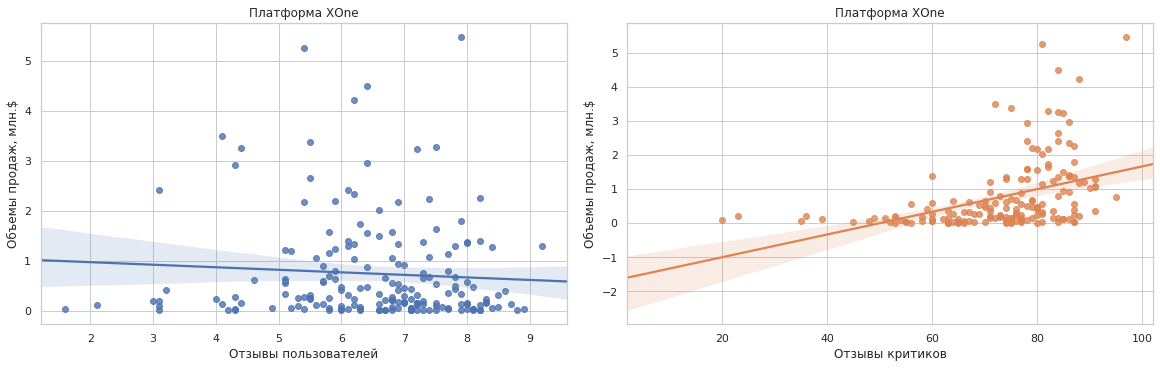

In [47]:
regplots_scores(platforms.pop(0))

Практически у всех платформ высока зависимость продаж от оценок критиков, которая (для платформ семейства PS) может доходить до 35%. Оценки пользователей имеют меньшее влияние на объемы продаж и в большинстве случаев имеют хоть и не всегда высокое, но всё-таки положительное влияние на объёмы продаж.

In [48]:
value_counts_percent(actual_games['genre'])

              count  percent
Action         1056    30.64
Role-Playing    373    10.82
Sports          358    10.39
Misc            329     9.55
Adventure       314     9.11
Shooter         314     9.11
Racing          166     4.82
Fighting        138     4.00
Simulation      131     3.80
Strategy        107     3.11
Platform         96     2.79
Puzzle           64     1.86


In [49]:
(actual_games.pivot_table(index='genre', values='total_sales', aggfunc='sum')
             .sort_values(by='total_sales', ascending = False)
             .T)

genre,Action,Shooter,Role-Playing,Sports,Misc,Racing,Platform,Fighting,Simulation,Adventure,Strategy,Puzzle
total_sales,521.71,393.02,230.59,229.80,122.53,77.93,64.59,58.01,49.98,41.03,20.57,8.35


Наиболее популярными (продаваемыми) являются игры жанров *Action* и *Sports*. Они же являются и самыми прибыльными. При этом пятерка наиболее популярных жанров приносит наибольшую прибыль. Чётко выделяются жанры с высокими и низкими продажами -- игры самых продаваемых жанров приносят выручки в 13.5 раз больше, чем игры самых непопулярных жанров.

### 2.3.2 Составление портрета пользователя каждого региона

platform,X360,PS3,PS4,XOne,3DS
na_sales,226.80,168.26,108.74,93.12,82.65


platform,PS3,PS4,X360,3DS,PC
eu_sales,163.10,141.09,117.10,61.27,56.70


platform,3DS,PS3,PSP,PS4,Wii
jp_sales,100.62,49.39,24.04,15.96,8.97


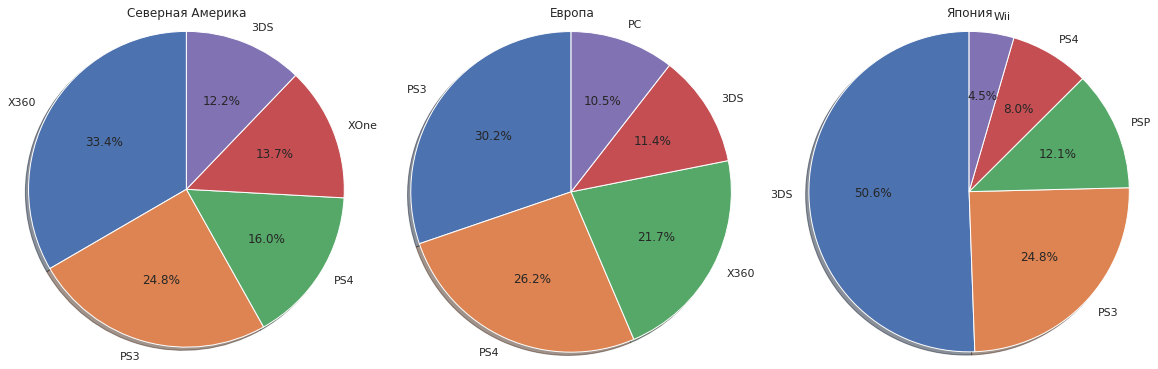

In [50]:
top5_pie_charts('platform')

В Северной Америке и Европе лидируют одни и те же платформы. Порядок Топ-5 не идентичен, но, в целом, рейтинг похож. Рынок Северной Америки более прибыльный в сравнении с Европейским.  
  
Японский рынок компьютерных игр стоит особняком от североамериканского и европейского -- их пятый номер на рынке Японии в лидерах, в Топ-5 входят платформы, которых нет ни в Северной Америке, ни в Европе. Прибыльность японского рынка в разы меньше европейского.  
  
Японские геймеры предпочитают отечественного производителя. Вероятнее всего это специфика менталитета -- всё на благо страны и императора. Низкая прибыльность, вероятно, говорит о том, что времени для игр у японцев не так много -- опять же фанатичное трудолюбие на благо страны и императора. Это уже объект социального исследования, предоставленных данных для этого не достаточно.

genre,Action,Shooter,Sports,Role-Playing,Misc
na_sales,217.50,190.61,106.05,80.59,63.51


genre,Action,Shooter,Sports,Role-Playing,Racing
eu_sales,188.02,144.78,86.13,60.25,36.94


genre,Role-Playing,Action,Misc,Simulation,Fighting
jp_sales,71.20,55.69,12.84,11.57,10.69


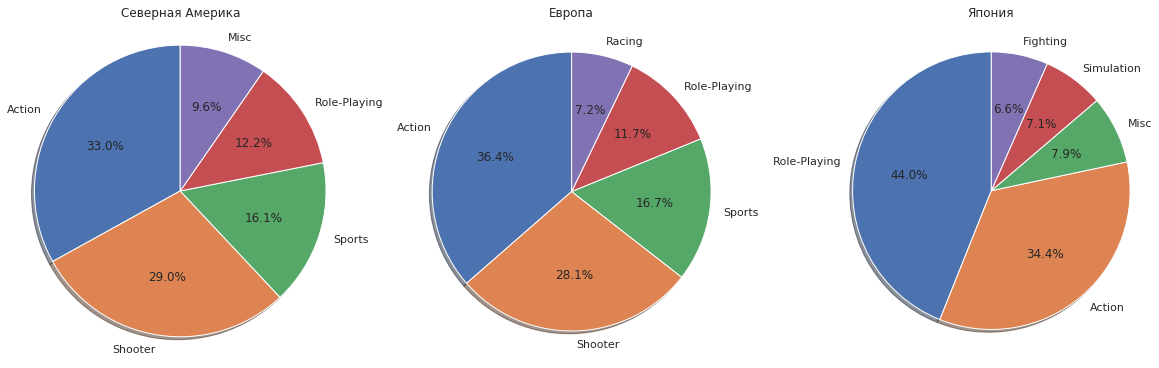

In [51]:
top5_pie_charts('genre')

Рейтинг жанров в Северной Америке и Европе практически идентичны. Лидерами являются "моторные" жанры -- *Action*, *Sports*, *Shooter*.  
  
Японский рынок здесь стоит меньшим особняком -- хотя в лидерах ролевые игры (которые для западного рынка в аутсайдерах), однако в Топ-5 входит *Action*. Возможно японцы устают постоянно быть маленькой шестерёнкой большого и слаженного механизма и проецируют желания ощутить себя королём, непопедимым воином или могущественным злобным орком через ролевые игры. В общем, требуются дополнительные исследования, не укладывающиеся в рамки переданных данных

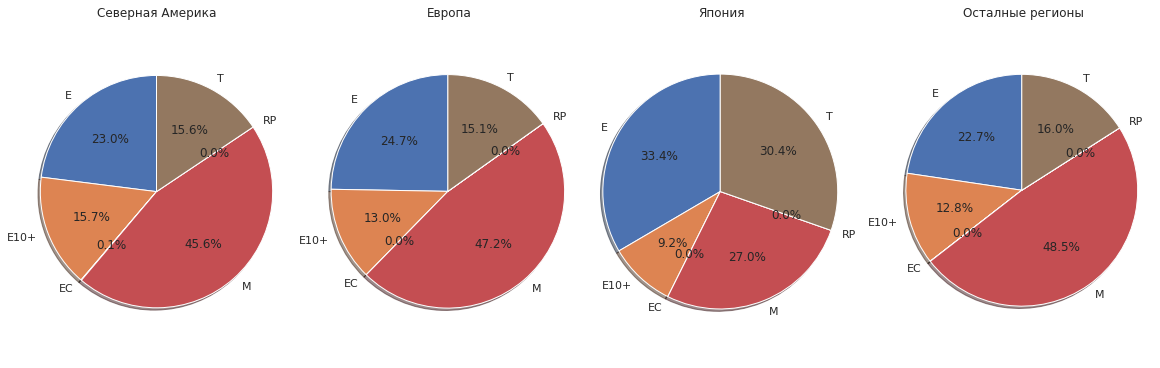

In [52]:
ESRB_effect()

Как видно из полученных данных, **рейтинг ESRB оказывает однозначное влияние на объемы продаж** -- состав категорий, процент продаж предельно близки по всем регионам продаж компьютерных игр. Кроме Японии, которая, как мы поняли, идёт своим путём.

***Промежуточный итог***  
  
По итогам проведённого анализ можно сделать следующие выводы.  
  
Заметный всплеск числа релизов начался приблизительно с 1994 года, интенсивно рос до 2000 года, после чего произошло их резкое ежегодное увеличение. Для анализа были выбраны платформы, суммарный объем продаж за представленный период времени которых был больше 100 млн.$.  
  
В процессе анализа стало очевидно, что каждая платформа имеет ограниченный срок "жизни" -- каждая из них появляется и, через некоторое время, становится неактуальной. Средний срок "жизни" платформы равен 10 годам. Таким образом к 2016 году будут "доживать" платформы появившиеся в 2006 году, а наиболее актуальными будут платформы, появившиеся в 2011 году. Поэтому для дальнейшего анализа будем рассматривать период с 2011 по 2016 год.  
  
По итогам дальнейшего анализа стало очевидно, что к 2016 году продаваемыми были игры 6-ти платформ. При этом у всех платформ наблюдлось падение продаж. Наиболее "живыми" являются платформы (в порядке убывания):
- **PS4**;
- **XOne**;
- **3DS**.  
  
При этом, ещё продаваемые **X360**, **PS3** и **Wii** уже не актуальны к 2016 году, а **PC** "эластична" -- продажи невелики, но относительно равномерны за весь период.  
  
Разница в абсолютных объемах продаж по платформам ярко выражена. Выделяются четыре лидера -- **X360**, **PS3**, **PS4**, **XOne**. Их средние значения также близки друг к другу. Лидерство данных платформ говорит об их актуальности (прибыльности) в выбранный промежуток времени для анализа.  
  
Далее было установлено, что практически у всех платформ высока зависимость продаж от оценок критиков, которая (для платформ семейства PS) может доходить до 35%. Оценки пользователей имеют меньшее влияние на объемы продаж и в большинстве случаев имеют хоть и не всегда высокое, но всё-таки положительное влияние на объёмы продаж.  
  
Наиболее популярными (продаваемыми) являются игры жанров *Action* и *Sports*. Они же являются и самыми прибыльными. При этом пятерка наиболее популярных жанров приносит наибольшую прибыль. Чётко выделяются жанры с высокими и низкими продажами -- игры самых продаваемых жанров приносят выручки в 13.5 раз больше, чем игры самых непопулярных жанров.  
  
В Северной Америке и Европе лидируют одни и те же платформы. Порядок Топ-5 не идентичен, но, в целом, рейтинг похож. Рынок Северной Америки более прибыльный в сравнении с Европейским.  
  
Японский рынок компьютерных игр стоит особняком от североамериканского и европейского -- их пятый номер на рынке Японии в лидерах, в Топ-5 входят платформы, которых нет ни в Северной Америке, ни в Европе. Прибыльность японского рынка в разы меньше европейского.  
  
Японские геймеры предпочитают отечественного производителя. Вероятнее всего это специфика менталитета -- всё на благо страны и императора. Низкая прибыльность, вероятно, говорит о том, что времени для игр у японцев не так много -- опять же фанатичное трудолюбие на благо страны и императора. Это уже объект социального исследования, предоставленных данных для этого не достаточно.  

Рейтинг жанров в Северной Америке и Европе практически идентичны. Лидерами являются "моторные" жанры -- *Action*, *Sports*, *Shooter*.  
  
Японский рынок здесь стоит меньшим особняком -- хотя в лидерах ролевые игры (которые для западного рынка в аутсайдерах), однако в Топ-5 входит *Action*. Возможно японцы устают постоянно быть маленькой шестерёнкой большого и слаженного механизма и проецируют желания ощутить себя королём, непопедимым воином или могущественным злобным орком через ролевые игры. В общем, требуются дополнительные исследования, не укладывающиеся в рамки переданных данных.  

В заключение проведенного анализа, было установлено, что рейтинг **ESRB** оказывает однозначное влияние на объемы продаж -- состав категорий, процент продаж предельно близки по всем регионам продаж компьютерных игр. Кроме Японии, которая, как мы поняли, идёт своим путём.

## 2.4 Проверка гипотез

На предыдущем этапе мы увидели, что платформа **PC** эластична, т.е. игры этой платформы пользуется хоть и не большим, но более или менее постоянным спросом. Интересно было бы узнать одинаковы ли средние пользовательские рейтинги платформ **PC** и какой-нибудь платформой из группы лидеров, например **Xbox One**. Данную проверку можно осуществить проверив **нулевую гипотезу**:  
  
$$
{H_0}^1: {\mu_1}^1 = {\mu_2}^1,\\
$$
  
Тогда **альтернативная гипотеза** примет вид:  

$$
{H_1}^1: {\mu_1}^1 \neq {\mu_2}^1,\\
$$

где:  
${\mu_1}^1$ - среднее значение пользовательского рейтинга платформы **PC**,  
${\mu_2}^1$ - среднее значение пользовательского рейтинга платформы **Xbox One**.  
   
Также интересно было бы узнать различаются ли пользовательские рейтинги популярных жанров, например *Action* и *Sports*. Данную проверку также можно осуществить проверив **нулевую гипотезу**:  
  
$$
{H_0}^2: {\mu_1}^2 = {\mu_2}^2,\\
$$
  
Тогда **альтернативная гипотеза** примет вид:  

$$
{H_1}^2: {\mu_1}^2 \neq {\mu_2}^2,\\
$$

где:  
${\mu_1}^2$ - среднее значение пользовательского рейтинга жанра *Action*,  
${\mu_2}^2$ - среднее значение пользовательского рейтинга жанра *Sports*.  
  
Для проверки нулевых гипотез необходимо посчитать ***р-уровень*** значимости для статистического различия средних двух генеральных совокупностей по имеющимся у нас выборкам. В соответствии с теорией, поскольку размер выборки значительно больше 30, значимым ***р-уровнем*** ($\alpha$) можно считать величину 0.05 (5%), поскольку t-распределение средних значений выборок стремиться к нормальному.

In [53]:
alpha = 0.05

results_1 = st.ttest_ind(
    actual_games.loc[(actual_games['platform'] == 'PC') & (~actual_games['user_score'].isna()),'user_score'], 
    actual_games.loc[(actual_games['platform'] == 'XOne') & (~actual_games['user_score'].isna()),'user_score'])

results_2 = st.ttest_ind(
    actual_games.loc[(actual_games['genre'] == 'Action') & (~actual_games['user_score'].isna()),'user_score'], 
    actual_games.loc[(actual_games['genre'] == 'Sports') & (~actual_games['user_score'].isna()),'user_score'])

print('p-значение_1: ', results_1.pvalue)
print('p-значение_2: ', results_2.pvalue)

p-значение_1:  0.6267602271422398
p-значение_2:  6.777606285487808e-22


***Промежуточный итог***  
  
Расчитанные значения ***р-уровня*** значимости показывают:
- значение ***р-уровня 1*** большее 0.05 говорит о том, что вероятность нахождения среднего значения пользовательского рейтинга одной платформы в доверительном интервале другой платформы статистически возможна, поэтому у нас нет  оснований отвергнуть гипотезу ${H_0}^1$, т.е. она верна: ${\mu_1}^1 = {\mu_2}^1$;
- значение ***р-уровня 2***, значительно меньшее $\alpha$ = 0.05, говорит о том, что среднее значение пользовательского рейтинга одного жанра статистически значимо отличаться от среднего значения пользовательского рейтинга другого жанра, поэтому у нас есть основания отвергнуть нулевую гипотезу ${H_0}^2$, т.е. верна альтернативная гипотеза ${H_1}^2$: ${\mu_1}^2 \neq {\mu_2}^2$.

Иными словами, средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковы, средние пользовательские рейтинги жанров *Action* и *Sports* различны.

# 3 Вывод

В ходе обработки и анализа переданных данных были выполнены преобразования и сделаны выводы, описанные ниже.

На этапе предобработки данных в таблице **games**:
- имена столбцов были приведены к нижнему регистру;
- были удалены строки с пропусками в названиях игр и годов выпуска;
- в столбце ***critic_score*** пропуски были заменены на значение -1, тип данных столбца был преобразован в *int*;
- в столбце ***user_score*** пропуски и значения *tbd* были заменены на значение -1, тип данных столбца был преобразован во *float*;
- в столбце ***rating*** пропуски были заменены на значение -1;
- тип данных столбца ***year_of_release*** был преобразован в *int*.  

Дубликаты строк в таблице **games** отсутствовали.

По итогам проведённого анализ были сделаны следующие выводы.  
  
Заметный всплеск числа релизов начался приблизительно с 1994 года, интенсивно рос до 2000 года, после чего произошло их резкое ежегодное увеличение. Для анализа были выбраны платформы, суммарный объем продаж за представленный период времени которых был больше 100 млн.$.  
  
В процессе анализа стало очевидно, что каждая платформа имеет ограниченный срок "жизни" -- каждая из них появляется и, через некоторое время, становится неактуальной. Средний срок "жизни" платформы равен 10 годам. Таким образом к 2016 году будут "доживать" платформы появившиеся в 2006 году, а наиболее актуальными будут платформы, появившиеся в 2011 году. Поэтому для дальнейшего анализа будем рассматривать период с 2011 по 2016 год.  
  
По итогам дальнейшего анализа стало очевидно, что к 2016 году продаваемыми были игры 6-ти платформ. При этом у всех платформ наблюдлось падение продаж. Наиболее "живыми" являются платформы (в порядке убывания):
- **PS4**;
- **XOne**;
- **3DS**.  
  
При этом, ещё продаваемые **X360**, **PS3** и **Wii** уже не актуальны к 2016 году, а **PC** "эластична" -- продажи невелики, но относительно равномерны за весь период.  
  
Разница в абсолютных объемах продаж по платформам ярко выражена. Выделяются четыре лидера -- **X360**, **PS3**, **PS4**, **XOne**. Их средние значения также близки друг к другу. Лидерство данных платформ говорит об их актуальности (прибыльности) в выбранный промежуток времени для анализа.  
  
Далее было установлено, что практически у всех платформ высока зависимость продаж от оценок критиков, которая (для платформ семейства PS) может доходить до 35%. Оценки пользователей имеют меньшее влияние на объемы продаж и в большинстве случаев имеют хоть и не всегда высокое, но всё-таки положительное влияние на объёмы продаж.  
  
Наиболее популярными (продаваемыми) являются игры жанров *Action* и *Sports*. Они же являются и самыми прибыльными. При этом пятерка наиболее популярных жанров приносит наибольшую прибыль. Чётко выделяются жанры с высокими и низкими продажами -- игры самых продаваемых жанров приносят выручки в 13.5 раз больше, чем игры самых непопулярных жанров.  
  
В Северной Америке и Европе лидируют одни и те же платформы. Порядок Топ-5 не идентичен, но, в целом, рейтинг похож. Рынок Северной Америки более прибыльный в сравнении с Европейским.  
  
Японский рынок компьютерных игр стоит особняком от североамериканского и европейского -- их пятый номер на рынке Японии в лидерах, в Топ-5 входят платформы, которых нет ни в Северной Америке, ни в Европе. Прибыльность японского рынка в разы меньше европейского.  
  
Японские геймеры предпочитают отечественного производителя. Вероятнее всего это специфика менталитета -- всё на благо страны и императора. Низкая прибыльность, вероятно, говорит о том, что времени для игр у японцев не так много -- опять же фанатичное трудолюбие на благо страны и императора. Это уже объект социального исследования, предоставленных данных для этого не достаточно.  

Рейтинг жанров в Северной Америке и Европе практически идентичны. Лидерами являются "моторные" жанры -- *Action*, *Sports*, *Shooter*.  
  
Японский рынок здесь стоит меньшим особняком -- хотя в лидерах ролевые игры (которые для западного рынка в аутсайдерах), однако в Топ-5 входит *Action*. Возможно японцы устают постоянно быть маленькой шестерёнкой большого и слаженного механизма и проецируют желания ощутить себя королём, непопедимым воином или могущественным злобным орком через ролевые игры. В общем, требуются дополнительные исследования, не укладывающиеся в рамки переданных данных.  

В заключение проведенного анализа, было установлено, что рейтинг **ESRB** оказывает однозначное влияние на объемы продаж -- состав категорий, процент продаж предельно близки по всем регионам продаж компьютерных игр. Кроме Японии, которая, как мы поняли, идёт своим путём.
  
По итогам проверки гипотез были сделаны выводы, что средние пользовательские рейтинги платформ **Xbox One** и **PC** одинаковы, средние пользовательские рейтинги жанров *Action* и *Sports* различны.  

***Таким образом, рекламные усилия необходимо прилагать для игр жанров Action, Sports, Shooter -- для всех регионов кроме Японии, жанров Role-Playing, Action, Sports -- для Японии, для платформ PS4, XOne, 3DS.***